# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [2]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [3]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

____

**I used the describe() method function above**

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

___

#### **Answer**

Some pros of choosing this chart type are that a user can easily tell at a glance how the different survey response categories compare with one another. Additionally, the author of the chart included a legend as well which allows us to easily discern what each of the categories mean at a glance. 

As for cons, I believe this graph would be more effective if the author had included the specific survey question. As it stands, I can see that responses range from “Bored” to “Excited,” but it’s unclear what the participants were reacting to.

If I were to recreate the graph, I would ensure that the colors used have sufficient contrast and are accessible to color-blind individuals—both of which are easy to test online. Additionally, I would make sure the text color contrasts well with the background to enhance readability.

Finally, while I’ve often heard that pie charts shouldn’t be used for more than three variables, I think this one works. The “Not great” category is somewhat narrow, but it remains legible at 5% of responses. However, if any category were smaller than 5%, the label might become too cramped, potentially bleeding into adjacent sections. In that case, an alternative chart type would be more appropriate.




___

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [4]:
num_customers = 100
np.random.seed(0)

In [5]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [6]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [7]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [8]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [9]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [10]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [11]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [12]:
df_bank.loc[2, "AccountID"] = np.nan

In [13]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [14]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [15]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

In [16]:
df_bank_loaded.describe()

,CustomerID,AccountID
count,99.000000,98.000000
mean,49.000000,46.551020
std,28.722813,27.679358
min,0.000000,0.000000
25%,24.500000,25.500000
50%,49.000000,42.000000
75%,73.500000,71.000000
max,98.000000,97.000000


In [17]:
df_bank_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     99 non-null     float64
 1   BirthDate      99 non-null     object 
 2   SSN            99 non-null     object 
 3   AccountID      98 non-null     float64
 4   AccountOpened  99 non-null     object 
 5   AccountType    99 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [18]:
df_bank_loaded.head(10)

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings
8,8.0,2006-10-31,121-74-2917,24.0,2046-11-17,savings
9,9.0,2010-12-10,844-31-4793,29.0,2048-06-01,checking


Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [19]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [20]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [21]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [22]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [23]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [24]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [25]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [26]:
df_bank_datefix['BirthDate'].dtype

dtype('<M8[ns]')

___

^ **Clarification**

Looked up that the dtype above, '<M8[ns]>' corresponds to datetime with nanosecond prescision. 

___

3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.


a. First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"
- This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

-  https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

- ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.




b.  Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

- This page gives an answer:

- https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

- ChatGPT also gives a good answer.  I recommend looking at both of them!

- Now try it on your own:

- Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

- Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

_____

#### **Answer**

**Indexing**

**ChatGPT Prompt:** 
- **Me**: "I am trying to check for null values, or na values -- specifically, I want to find out which rows contain the null values in my data frame, df_bank_datefix"

- **Chat**: `df_bank_datefix[df_bank_datefix.isnull().any(axis=1)]`

- **Me**: "hmm can you help me to specifically return (index) the rows that contain the null values?"

- **Chat**: `null_indices = df_bank_datefix[df_bank_datefix.isnull().any(axis=1)].index
print(null_indices)`

And I edited that into the following: 

In [27]:
df_bank_datefix[df_bank_datefix.isnull().any(axis=1)]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking


Looks like there is only one row that has a null value -- Per the instructions, we can remove it. (since it is a null AccountID I don't really think that it's possible to imputate this particular value and we are better off dropping it. )

#### **Removing the NaN containing row**

First Check the number of rows: 

In [28]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


Next drop the NaN containing row: 

In [29]:
df_bank_datefix = df_bank_datefix.drop(index=2)

You can tell by the row counts and the index on the side that the row has successfully been removed 

In [30]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


___

4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

- Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

- Again, Google provides me with a page that addresses the question:

- https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

- To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

- This leads me to the following documentation.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

___

#### **Answer**

**ChatGPT Prompt:** 

(Going off the pronmpt from above)
- **Me**: "Next can you help me find duplicate rows in the dataset?"

- **Chat**: *Yes! To find duplicate rows in your dataset (df_bank_datefix), use the following methods:

1. Find All Duplicate Rows

- `duplicates = df_bank_datefix[df_bank_datefix.duplicated()]
print(duplicates)`

🔹 Explanation:
	•	df.duplicated() returns a boolean series where True indicates duplicate rows (excluding the first occurrence).
	•	Filtering the DataFrame shows all duplicate rows.

2. Find Duplicate Rows Including the First Occurrence

- `duplicates_all = df_bank_datefix[df_bank_datefix.duplicated(keep=False)]
print(duplicates_all)`

🔹 Explanation:
	•	keep=False marks all occurrences of duplicates instead of keeping the first.

3. Find Duplicates Based on Specific Columns

- If you want to check for duplicates only in certain columns (e.g., 'CustomerID' and 'SSN'):

- `duplicates_specific = df_bank_datefix[df_bank_datefix.duplicated(subset=['CustomerID', 'SSN'], keep=False)]
print(duplicates_specific)`

🔹 This checks duplicates based on 'CustomerID' and 'SSN' only.

4. Count the Number of Duplicates

-  `num_duplicates = df_bank_datefix.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")`



I thought the first one looked reasonable -- but let's call it directly instead of printing

In [31]:
duplicates = df_bank_datefix[df_bank_datefix.duplicated()]
duplicates

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType


**Removing the Duplicates**

Because there are no duplicate rows in this dataset, there is no need for us to remove anything at this stage

____

5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

____

**Unfortunately, this is backwards, we need to find out if any account IDs are shared between multiple customers, not if any customers have more than one account.**

Fortunately, however, we can edit their code and combine it with the exapmples from above for finding duplicate rows. 


In [32]:
# Group By AccountID and then count the number of unique CustomerIDs for each one
non_unique = df_bank_datefix.groupby('AccountID')['CustomerID'].nunique()
# Flag anything that has repeated customer ids
Problem_accounts = non_unique[non_unique > 1]

# Use problem accounts from before to Index the original DF
df_problem_accounts = df_bank_datefix[df_bank_datefix['AccountID'].isin(Problem_accounts)].sort_values(by=['AccountID', 'CustomerID'])
df_problem_accounts


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
56,56.0,1980-06-14,326-18-7713,2.0,2013-08-21,savings
41,41.0,1996-08-30,560-38-9694,3.0,2073-11-13,savings
74,74.0,2023-01-19,086-36-1272,3.0,2093-12-24,cd
78,78.0,1973-08-10,020-16-6942,3.0,1990-01-24,savings


Now for the directions -- we only want to show the first instance of each case. 

In [33]:
df_problem_accounts_first = df_problem_accounts[~df_problem_accounts.duplicated(subset=['AccountID'], keep='first')]
df_problem_accounts_first


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
56,56.0,1980-06-14,326-18-7713,2.0,2013-08-21,savings
41,41.0,1996-08-30,560-38-9694,3.0,2073-11-13,savings


# Problem ^

6. Count how many distinct AccountIDs there are.

In [34]:
account_id_counts = df_bank_datefix['AccountID'].value_counts()
account_id_counts

len(account_id_counts)

63

Above, I used the value_counts() method to get a series of all distinct account IDs and then a count of how many times each occured. To get the number of distinct values, I just took the length of that list

____

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [35]:
n = len(pd.unique(df_bank_datefix['AccountID']))
n

63

Same answer as I got above^

___

7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [36]:
df_unique_accounts = df_bank_datefix.drop_duplicates(subset=['AccountID'], keep='first')
df_unique_accounts


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings
...,...,...,...,...,...,...
88,88.0,1962-02-07,327-09-3267,97.0,1989-10-03,cd
90,90.0,1969-06-18,395-31-7064,34.0,2010-12-28,checking
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking


Get The Birthdays Down (I would drop these columns if we were training models on this since they would be colinear, but in this case we are just doing EDA).

First The Age of the Customer

In [37]:

today = datetime.today()
df_bank_datefix['Days_Since_Birth'] = (today - df_bank_datefix['BirthDate']).dt.days
df_bank_datefix['Age_of_Customer'] = df_bank_datefix['Days_Since_Birth'] // 365
df_bank_datefix = df_bank_datefix.drop(columns=['Days_Since_Birth'])
df_bank_datefix


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8
...,...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings,56
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking,49
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd,36
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd,64


And now how old they were when the account was opened

In [38]:
df_bank_datefix['Days_from_Birth_to_Account_Opening'] = (df_bank_datefix['AccountOpened'] - df_bank_datefix['BirthDate']).dt.days
df_bank_datefix['Age_of_Account_Opening'] = df_bank_datefix['Days_from_Birth_to_Account_Opening'] // 365
df_bank_datefix = df_bank_datefix.drop(columns=['Days_from_Birth_to_Account_Opening'])
df_bank_datefix


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer,Age_of_Account_Opening
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,0
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,73
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,17
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,73
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,71
...,...,...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings,56,68
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking,49,35
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd,36,65
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd,64,33


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

___

#### **Answer**


In [39]:
df_bank_datefix[['Age_of_Account_Opening', 'Age_of_Customer']].mean()

Age_of_Account_Opening    43.010417
Age_of_Customer           34.145833
dtype: float64

In [40]:
df_bank_datefix[['Age_of_Account_Opening', 'Age_of_Customer']].median()

Age_of_Account_Opening    45.0
Age_of_Customer           33.0
dtype: float64

In [41]:
df_bank_datefix[['Age_of_Account_Opening', 'Age_of_Customer']].mode()

,Age_of_Account_Opening,Age_of_Customer
0,61.0,24
1,NaN,28


The mean, median and mode of the Age of Customers are ~34, 33, and 28 years old respectively. Now let's check for outliers. (I'm staring with a box and whisker plot to see if there are any outliers from a statistical POV)

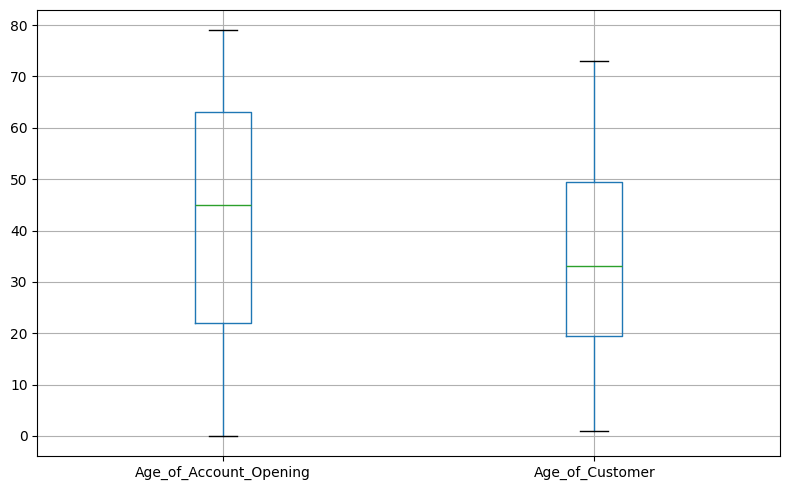

In [42]:
import matplotlib.pyplot as plt


_ = pd.plotting.boxplot(
    df_bank_datefix[['Age_of_Account_Opening', 'Age_of_Customer']],
    figsize=(8,5)
    )

plt.tight_layout()
plt.show()

So there are no datapoints outside the whiskers so I would take that to mean that there are no outliers from a purely statistical point of view. However, this does make me rather suspicious because it suggests that there are customers who are opening bank acounts when they are 0-1 years old. Let's use the describe method to look into it further. 

In [43]:
df_bank_datefix[['Age_of_Account_Opening', 'Age_of_Customer']].describe()

,Age_of_Account_Opening,Age_of_Customer
count,96.000000,96.000000
mean,43.010417,34.145833
std,23.973448,19.882274
min,0.000000,1.000000
25%,22.000000,19.500000
50%,45.000000,33.000000
75%,63.000000,49.500000
max,79.000000,73.000000


And we can see from the min section that there are indeed some records that indicate that some customers opened accounts when they were 0 and that they are 1 year old currently. This could be a case of parents opening some sort of account for their children, but it is definitely an orange flag that we should look into. 

____

9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [44]:
df_bank_datefix.groupby('AccountType')['AccountType'].count()

AccountType
cd          29
checking    32
savings     35
Name: AccountType, dtype: int64

In [45]:
df2 = df_bank_datefix.copy()
one_hot = pd.get_dummies(df_bank_datefix["AccountType"])
df2 = df2.join(one_hot)
df2.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer,Age_of_Account_Opening,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,0,True,False,False
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,73,True,False,False
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,17,False,True,False
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,73,False,False,True
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,71,False,False,True


Now, change the cd, checking, and savings columns into integers.

In [46]:
df2[['checking', 'savings', 'cd']] = df2[['checking', 'savings', 'cd']].astype(int)
df2

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer,Age_of_Account_Opening,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,0,1,0,0
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,73,1,0,0
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,17,0,1,0
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,73,0,0,1
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings,56,68,0,0,1
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking,49,35,0,1,0
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd,36,65,1,0,0
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd,64,33,1,0,0


Looks like they're integers now :) 

___

#### **10. Are there any other data values that do not seem right?  If not, give an example?**

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

___

#### **Queston 10: Answer**

So a couple of things that I noticed earlier were that: 
- A) There were a number of times when the Date of Account Opening was well before the birthdate of the customer. This obviously seemed very suspicious because a customer cannot open an account if they have not been born yet. A couple of potential possibilities into why this could be happening are: 
    - A default value was being populated for some of the dates for AccountOpened
    - Perhaps an account belonged to a diseased relative or similar and it was passed down to a beneficiary. 
        - This could be elucidated by lookking into the details of the dataset further or (if we worked in the field) asking if this were indeed possible. 
    - Additionally, because this is an 'example' dataset, perhaps the dates are not alligned to be before 2025, Although I would question the logic begind this particular case. 

*(To be Continued After Illustration...)*

**Example Illustration**

In [47]:
df2.query("Age_of_Account_Opening > Age_of_Customer")

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer,Age_of_Account_Opening,cd,checking,savings
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,73,1,0,0
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,73,0,0,1
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,71,0,0,1
8,8.0,2006-10-31,121-74-2917,24.0,2046-11-17,savings,18,40,0,0,1
9,9.0,2010-12-10,844-31-4793,29.0,2048-06-01,checking,14,37,0,1,0
11,11.0,1990-11-22,509-92-0704,25.0,2036-03-17,savings,34,45,0,0,1
15,15.0,2004-05-09,417-04-6784,83.0,2031-01-21,cd,20,26,1,0,0
16,16.0,1990-02-10,527-61-9953,33.0,2047-01-25,cd,35,56,1,0,0
17,17.0,1996-10-15,377-72-0498,32.0,2063-08-28,checking,28,66,0,1,0
18,18.0,2001-12-22,745-86-2436,70.0,2070-08-26,cd,23,68,1,0,0


B) Another thing that I noticed was that there were more than a few occurances where an account was opened before a customer had reached the age of 5. Both of these use cases seemed very suspicious to me, and indeed there were instances were a customer was either 0 or 1 years old when an account was opened. (There was one instance were the age of the customer was 3 and the age of the customer when the account was opened was 49.) A few ideas behind why these could be the case are: 
    - The two dates were accidentally switched at the data entry phase. 
    - There was some sort of mistake during the data entry phase 
        - Etc. 



**Illustration**

In [48]:
df2.query("Age_of_Account_Opening < 5 or Age_of_Customer < 5")

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age_of_Customer,Age_of_Account_Opening,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,0,1,0,0
23,23.0,2021-12-11,939-09-9746,56.0,2071-09-01,cd,3,49,1,0,0
40,40.0,1952-03-08,291-98-5506,82.0,1953-05-05,cd,73,1,1,0,0
46,46.0,1994-09-08,826-66-1458,69.0,1997-05-02,savings,30,2,0,0,1
51,51.0,2013-03-02,038-52-1394,84.0,2014-05-09,checking,12,1,0,1,0
61,61.0,2023-03-31,040-18-6728,53.0,2068-01-17,savings,1,44,0,0,1
62,62.0,2022-08-23,719-02-2091,51.0,2090-07-02,cd,2,67,1,0,0
66,66.0,1959-10-01,929-11-8240,29.0,1962-08-06,cd,65,2,1,0,0
74,74.0,2023-01-19,086-36-1272,3.0,2093-12-24,cd,2,70,1,0,0
81,81.0,2023-12-26,299-00-8770,10.0,2029-12-29,savings,1,6,0,0,1


____

11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

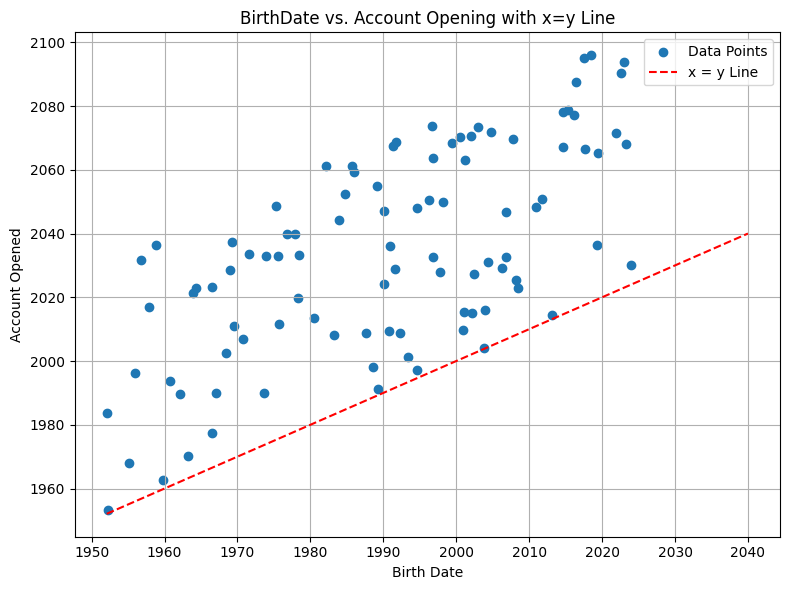

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"

min_date = min(df2["BirthDate"].min(), df2["AccountOpened"].min())
max_date = pd.Timestamp("2040-01-01")

ax.scatter(df2["BirthDate"], df2["AccountOpened"], label="Data Points") # create a scatter plot based on these two dates
ax.plot([min_date, max_date], [min_date, max_date], color='red', linestyle='--', label="x = y Line")


ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis
ax.set_title("BirthDate vs. Account Opening with x=y Line")
ax.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


#### **Answer**

Regarding the graph above, I used a red line to illustrate the x=y line. This line represents any account that was opened the year that an individual was born. As you can tell, there are a number of examples where accounts were seemingly opened either right when an individual was born or right after they were born. However, this is not the majority of the people. On average, it looks like people open an account close to 20 years after they are born which makes logical sense. 

Additionally, there are no points that lie below the x=y line (which would be non-sensical to see so I am glad that it's not happening) and a lot of the points that lie after the year 2020 are in line with the rest of the data, so I am inclined to believe now that these were just generated for illustration and I shouldn't think that they need to occur before 2025 for example. 

___

# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

___

#### **Answer Explanation**

For this one, they mentioned at some point that pie charts were essentailly evil and that we shouldn't use them, they *then* said that we should investigate replacing them with a bar graph instead, so I'll plot the evil pie chart and then the bar graph as well. 

In order to do this, I am going to import one of the datasets that my group was researching last semester because it had some columns that lend well to this graphing question. 

___

First, let's import some data and do some data prep: 

In [50]:
Power_Generation = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester one/AI for Leaders/Datasets/EIA_Power_Mix_2023.csv")

Power_Generation.head()

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_4725/1205238750.py:1: DtypeWarning: Columns (17,18,35,36,37,38,40,41,42,51,52,53,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  Power_Generation = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester one/AI for Leaders/Datasets/EIA_Power_Mix_2023.csv")


,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Technology,Prime Mover,Unit Code,...,Planned Energy Source 1,Planned New Nameplate Capacity (MW),Planned Repower Month,Planned Repower Year,Other Planned Modifications?,Other Modifications Month,Other Modifications Year,Multiple Fuels?,Cofire Fuels?,Switch Between Oil and Natural Gas?
0,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,1,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
1,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,2,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
2,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,3,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,NaN,NaN
3,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,5.1,Petroleum Liquids,IC,NaN,...,NaN,,,,NaN,,,N,N,N
4,63560,"Sand Point Generating, LLC",1,Sand Point,AK,Aleutians East,WT1,Onshore Wind Turbine,WT,NaN,...,NaN,,,,NaN,,,NaN,NaN,NaN


In [51]:
powergeneration_categories = Power_Generation[['Technology']]
powergeneration_categories
print(powergeneration_categories["Technology"].apply(type).value_counts()) 

Technology
<class 'str'>    26010
Name: count, dtype: int64


In [52]:
new_powergen_stats = powergeneration_categories.groupby('Technology').size().reset_index(name='Count')
new_powergen_stats = new_powergen_stats.sort_values(by='Count', ascending=False)


____

#### **Showing the Graphs**

**First off, the gross one:**

This is mostly used to illustrate why a pie chart is a bad idea. It was actually really hard to label it properly because there were so many tiny slices in the pie that it was impossible to plot them without overlapping in the pie itself, so I ended up just having to move it out to the legend. 

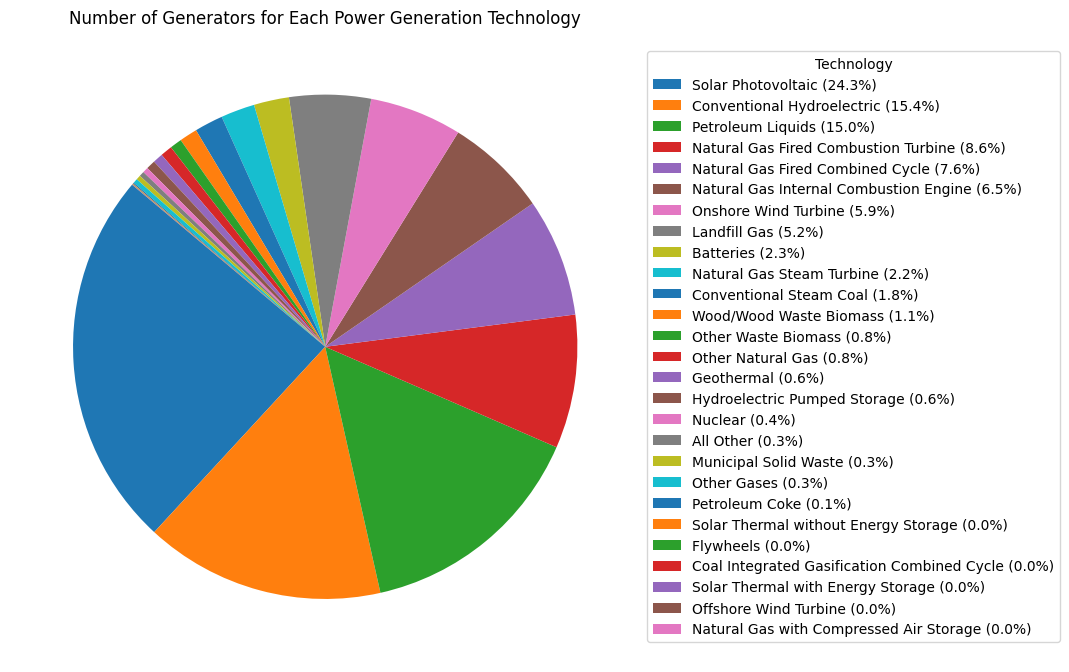

In [53]:
total = sum(new_powergen_stats['Count'])
percentages = [(count / total) * 100 for count in new_powergen_stats['Count']]
legend_labels = [f"{tech} ({pct:.1f}%)" for tech, pct in zip(new_powergen_stats['Technology'], percentages)]

plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(
    new_powergen_stats['Count'], 
    labels=None,  # Remove labels from the pie itself
    startangle=140  # Rotate for better spacing
)

# Add legend with technology names and percentages
plt.legend(wedges, legend_labels, title="Technology", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Number of Generators for Each Power Generation Technology")
plt.tight_layout()
plt.show()

**And now the prettier one**

This is mostly to illustrate that bar graphs are a better way to illustrate the data. Another addition could be a pareto diagram, where we show the running total percentage across all 'generators'.

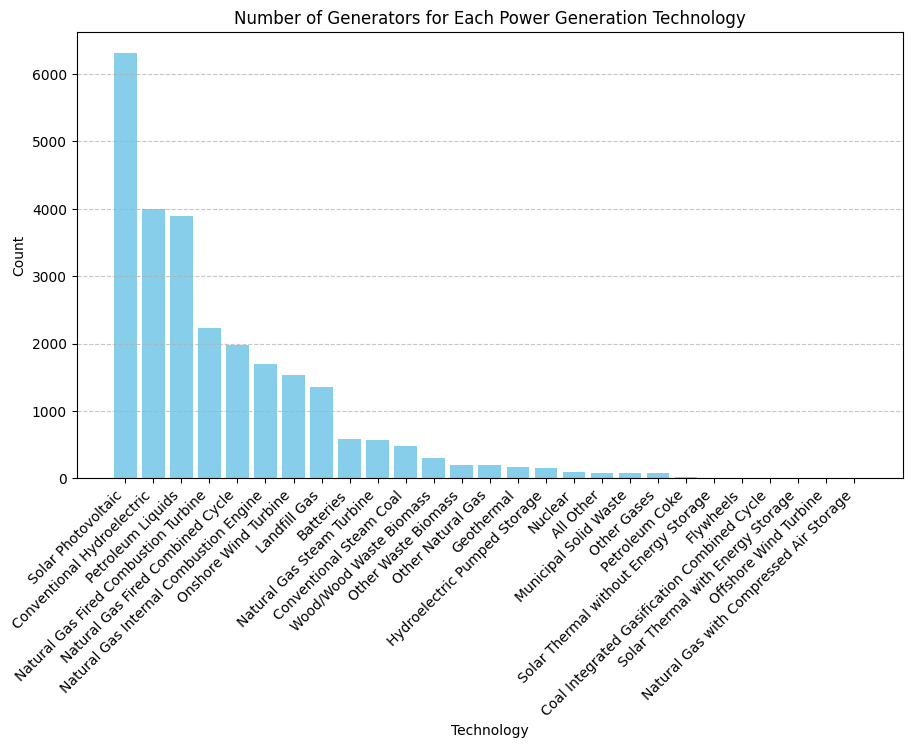

In [54]:
plt.figure(figsize=(10,5))
plt.bar(new_powergen_stats['Technology'], new_powergen_stats['Count'], color='skyblue')
plt.tight_layout()
plt.xlabel("Technology")
plt.ylabel("Count")
plt.title("Number of Generators for Each Power Generation Technology")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

